In [1]:
!pip install -q keras

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.4.1


In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/My Drive/cars1'
valid_path = '/content/drive/My Drive/cars1/Test'

In [8]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 2s 0us/step


In [9]:
for layer in resnet.layers:
    layer.trainable = False

In [13]:
folders = glob('/content/drive/My Drive/cars1/Train/*')
folders

['/content/drive/My Drive/cars1/Train/lamborghini',
 '/content/drive/My Drive/cars1/Train/audi',
 '/content/drive/My Drive/cars1/Train/mercedes']

In [14]:
x = Flatten()(resnet.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,#tilt
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/cars1/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1047 images belonging to 3 classes.


In [22]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/cars1/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 90 images belonging to 3 classes.


In [23]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,  
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
33/33 [==============================] - 617s 18s/step - loss: 4.5766 - accuracy: 0.3640 - val_loss: 1.3264 - val_accuracy: 0.5222
Epoch 2/50
33/33 [==============================] - 162s 5s/step - loss: 1.2688 - accuracy: 0.4854 - val_loss: 1.1819 - val_accuracy: 0.5000
Epoch 3/50
33/33 [==============================] - 163s 5s/step - loss: 1.0108 - accuracy: 0.5404 - val_loss: 0.9556 - val_accuracy: 0.6222
Epoch 4/50
33/33 [==============================] - 164s 5s/step - loss: 1.0322 - accuracy: 0.5532 - val_loss: 1.5487 - val_accuracy: 0.3889
Epoch 5/50
33/33 [==============================] - 164s 5s/step - loss: 1.1736 - accuracy: 0.5303 - val_loss: 1.8552 - val_accuracy: 0.4000
Epoch 6/50
33/33 [==============================] - 164s 5s/step - loss: 1.3358 - accuracy: 0.4770 - val_loss: 0.8896 - val_accuracy: 0.6333
Epoch 7/50
33/33 [==============================] - 163s 5s/step - loss: 0.8255 - accuracy: 0.6489 - val_loss: 1.6549 - val_accuracy: 0.4889
Epoch 8/50
3

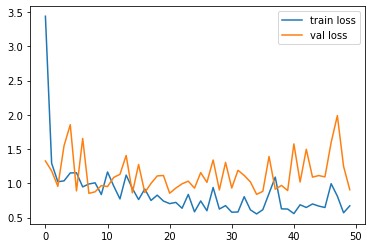

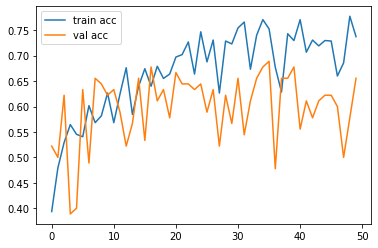

<Figure size 432x288 with 0 Axes>

In [24]:
# plotting loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
#  saving as h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet_cars50.hdf5')

In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred 

array([[1.43657543e-03, 9.73059177e-01, 2.55042296e-02],
       [2.33844027e-01, 7.57828474e-01, 8.32745153e-03],
       [6.63201034e-01, 2.54926026e-01, 8.18729177e-02],
       [2.76954263e-01, 2.38896487e-03, 7.20656812e-01],
       [9.86497343e-01, 1.14278421e-02, 2.07482534e-03],
       [4.76184994e-01, 3.35512459e-02, 4.90263760e-01],
       [1.41861424e-01, 3.50813001e-01, 5.07325649e-01],
       [2.02304106e-02, 2.90642609e-03, 9.76863146e-01],
       [1.04671270e-02, 9.46234167e-01, 4.32987511e-02],
       [6.10411465e-01, 6.54912442e-02, 3.24097276e-01],
       [8.50809634e-01, 1.21843621e-01, 2.73467787e-02],
       [3.71769428e-01, 4.11093712e-01, 2.17136875e-01],
       [2.62980387e-02, 2.36294500e-06, 9.73699570e-01],
       [4.87929472e-04, 9.91530061e-01, 7.98205473e-03],
       [3.75797553e-03, 4.04972732e-02, 9.55744743e-01],
       [1.81860611e-01, 7.64445126e-01, 5.36942557e-02],
       [9.59122717e-01, 2.91925087e-03, 3.79580855e-02],
       [1.63642056e-02, 7.58440

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([1, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2,
       0, 1])

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_resnet_cars50.hdf5')

In [36]:
img=image.load_img('/content/drive/My Drive/cars1/Test/audi/26.jpg',target_size=(224,224))  

In [37]:
x=image.img_to_array(img)
x

array([[[ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        ...,
        [ 34.,  44.,  54.],
        [ 34.,  44.,  54.],
        [ 34.,  44.,  54.]],

       [[ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        ...,
        [ 23.,  33.,  43.],
        [ 23.,  33.,  43.],
        [ 23.,  33.,  43.]],

       [[ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        ...,
        [ 18.,  28.,  38.],
        [ 18.,  28.,  38.],
        [ 18.,  28.,  38.]],

       ...,

       [[228., 223., 220.],
        [228., 223., 220.],
        [228., 223., 220.],
        ...,
        [239., 239., 241.],
        [239., 239., 241.],
        [239., 239., 241.]],

       [[227., 222., 219.],
        [227., 222., 219.],
        [227., 222., 219.],
        ...,
        [238., 238., 240.],
        [238., 238., 240.],
        [238., 238., 240.]],

       [[228., 223., 220.],
        [228., 223., 220.],
        [228., 2

In [38]:
x.shape

(224, 224, 3)

In [39]:
x=x/255

In [40]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

array([[4.5880461e-16, 1.0010697e-02, 9.8998928e-01]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data),axis=1)
a

array([2])

In [44]:
pip freeze> requirements.txt